# Investigating the Relationship Between Cholesterol Levels and Maximum Heart Rate to Predict the Presence of Heart Disease
### Group 76: Yeojun Han, Samin Hoque, Roberto Mulliadi, Jacob Shew 

## Introduction
Data science has shown emerging growth in medicine, specifically in disease diagnosis. As of 2018, heart disease is the second leading cause of mortality in Canada after cancer, which makes detecting heart disease a major focus in the medical field. Hence, we will apply our knowledge acquired from DSCI-100 to predict whether a patient has heart disease based on certain health markers. To do this, a KNN classification model will be applied to the Heart Disease Dataset from the UCI Machine Learning Repository, which includes four datasets representing different hospital locations. We chose the Cleveland Clinic Foundation dataset, which has 14 columns that describe the health conditions of an individual and 303 rows that represent each patient.


## Research Question
Given the health markers - cholesterol level and maximum heart rate - how accurately can we predict the angiographic disease status of a patient, and do these health markers represent good predictors for the model? 


## Methods & Results
To predict a patient’s angiographic disease status (healthy if num = 0, unhealthy otherwise), we will implement a classification model with the K-nearest neighbours algorithm and two explanatory variables, which are maximum heart rate (thalach) and cholesterol levels (chol).

High maximum heart rate is a likely indicator of enhanced physical and cardiorespiratory fitness, whereas high cholesterol levels are associated with increased chances of clogged arteries. Hence, the combination of low maximum heart rate and high cholesterol levels may indicate poor cardiac health and greater risk of heart disease. If we had more time to work on this project, we would like to explore other features such as blood pressure levels, but we decided to focus on maximum heart rate and cholesterol levels to keep the project more manageable. We can use KNN decision boundary plot with standardised predictive variables on the x and y axis, and the presence of a heart disease split by colour for visualisation. 



>### Legend
>
>#### Tables
>- Table 1: Main Heart Disease Dataframe
>- Table 2: Wrangled Dataframe
>- Table 3: Summary of obeservations
>- Table 4: Mean, Median, and Standard Deviations of the predictors
>- Table 5: Results of the Cross-Validation
>- Table 6: Predicted Values against True Values and Accuracy of Model
>- Table 7: Confusion Matrix for the Prediction
>
>#### Figures
>- Figure 1: Bar chart showing observation of each Class
>- Figure 2: Histogram showing the distribution of Maximum Heart Rate (thalach)
>- Figure 3: Histogram showing the distribution of Cholesterol (chol)
>- Figure 4: Scatterplot showing relationship between Cholesterol Level (chol), Maximum Heart Rate (thalach), and Heart Disease Status (heart_disease)
>- Figure 5: Line graph showing variation of accuracy of Neighbors (k)

### Libraries & Reading Data
First, our classification requires functions from libraries `tidyverse`, `repr`, and `tidymodels`, so we load them before reading any data.  

In [1]:
# We will need the following libraries to run and visualise the dataset
library(tidyverse, quietly = TRUE)
library(repr, quietly = TRUE)
library(tidymodels, quietly = TRUE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

We loaded the Cleveland dataset from the UCI website as a CSV file into `heart_disease_data`. Notice that the data from the website is already tidy: (a) each row is a single observation (of a single patient), (b) each column is a single variable (single feature of the patient), and (c) each value is a single cell (one patient's feature only gets input once in the dataset). 


In [2]:
# load heart disease data from the UCI machine learning repository
heart_disease_data <- read_csv(file = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"))

# show 10 rows
# the data in table already looks clean and tidy
head(heart_disease_data, 10)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0
62,0,4,140,268,0,2,160,0,3.6,3,2.0,3.0,3
57,0,4,120,354,0,0,163,1,0.6,1,0.0,3.0,0
63,1,4,130,254,0,2,147,0,1.4,2,1.0,7.0,2


#### Table 1

### Wrangling Data
We selected predictors (`thalach`, `chol`) and classification label (`num`). Our label has 5 factors: 0 signifies no heart disease and 1-4 signifies various heart diseases. We only consider whether the patient has a heart disease, so we replaced `num` with a boolean column `heart_disease` representing the presence of heart disease. 




In [3]:
# wrangle data
# replace num (0 for no heart disease, 1-4 for heart disease) with heart_disease column (TRUE if heart disease, FALSE otherwise) 
heart <- heart_disease_data %>% 
    select(thalach, chol, num) %>% 
    mutate(num = factor(num), heart_disease = factor(num != 0)) %>% 
    select(-num)

# show table of 10 rows of the data
heart %>% head(10)

thalach,chol,heart_disease
<dbl>,<dbl>,<fct>
150,233,FALSE
108,286,TRUE
129,229,TRUE
187,250,FALSE
172,204,FALSE
178,236,FALSE
160,268,TRUE
163,354,FALSE
147,254,TRUE


#### Table 2

3. The data also has no missing values, as represented by a cell with value`?`. The creators of this dataset represented missing values with `?` instead of `NA`. 




In [4]:
# number of missing data points (dataset uses "?" to mark missing points)
heart_missing <- heart %>% 
    filter(is.na(thalach) | thalach == "?" | is.na(chol) | chol == "?" | is.na(heart_disease) | heart_disease == "?")

# there are no missing points from the columns we use (thalach, chol, heart_disease)
num_missing <- heart_missing %>% count() %>% pull()
paste("The number of misisng values (of thalach, chol, heart_disease) in this dataset: ", toString(num_missing))

[1] "The number of misisng values (of thalach, chol, heart_disease) in this dataset:  0"

We split the dataset into training and testing sets, with 75% of the original data for training and 25% for testing. This provides sufficient data to perform cross-validation on our training set and to reasonably test our model. Setting strata = heart_disease ensures an even mix of categorical labels for our training and testing sets. 



In [5]:
options(repr.plot.width = 10, repr.plot.height = 8)
set.seed(1000)  # training and testing data splits are randomized

# tables 
# split data into train and test sets 
heart_split <- initial_split(heart, prop = 0.75, strata = heart_disease)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

### Exploratory Data Analysis of Predictors and Labels
Before we begin our analysis, we start with a preliminary data analysis using our training set. We will not use the testing set for explolatory data analysis to prevent bias from knowing the shape of our training data (the golden rule of machine learning). 

We summarize the label `heart_train` that we want to classify to see the number patients with and without heart disease in our observations in the training set. This way, we can see the number of patients with heart disease `heart_disease = TRUE` and the number of patients with no heart disease `heart_disease = FALSE`. We can see that there are more patients with no heart disease (54.185%) than patients with heart disease(45.815%).

In [6]:
# number of observations of each class (heart_disease == {TRUE, FALSE}) in training set 
heart_train_summary <- heart_train %>% 
    group_by(heart_disease) %>% 
    summarize(n = n())
heart_train_summary

heart_disease,n
<fct>,<int>
FALSE,123
TRUE,104


#### Table 3

We visualize the number of observations of patients with and without heart disease in a bar graph, where red represents the number of observations where the patient has no heart disease, and teal represents the number of patients with heart disease.

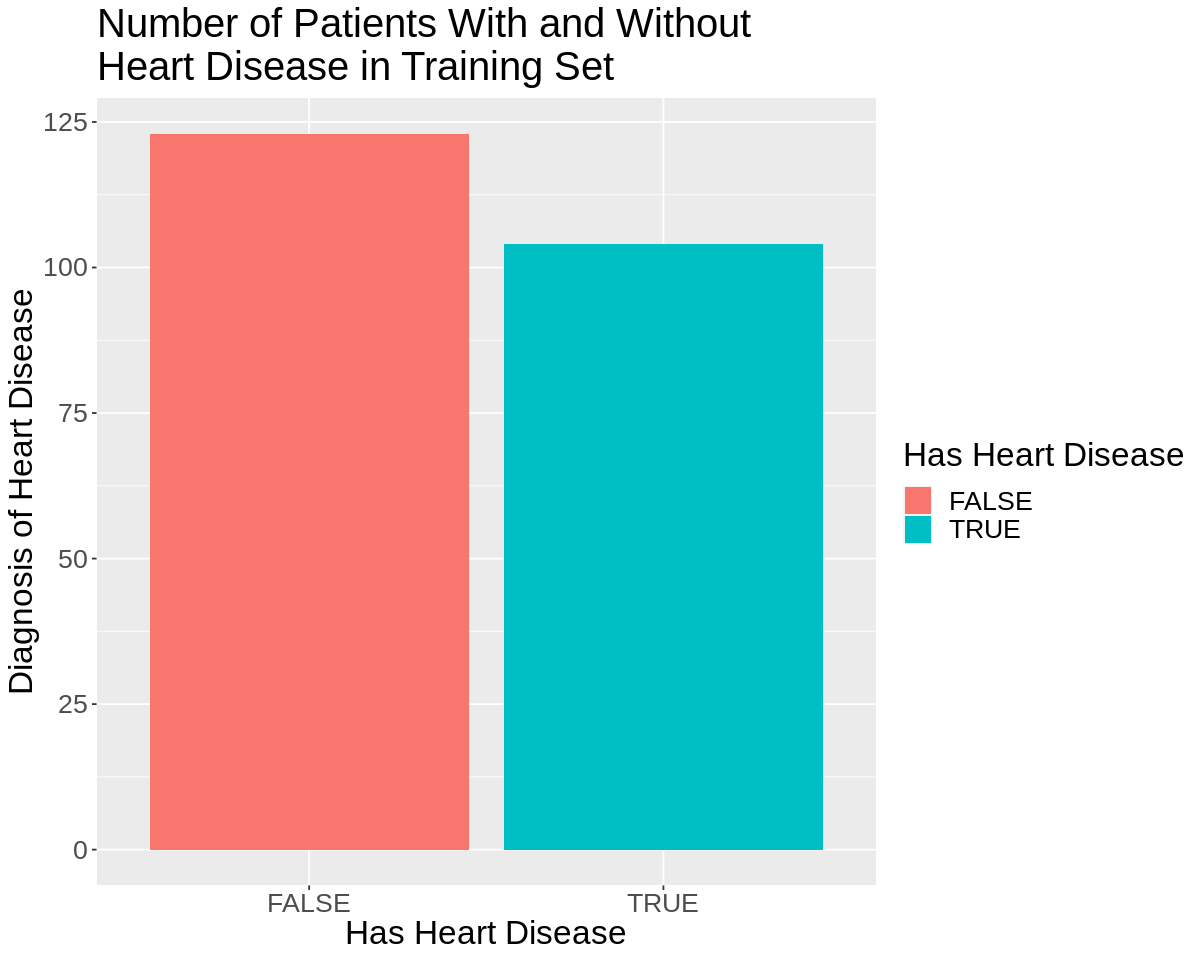

In [7]:
# bar graph of number of observations in each class (has heart disease = {TRUE, FALSE})
heart_train_summary_plot <- ggplot(heart_train_summary, aes(x = heart_disease, y = n, fill = heart_disease)) +
    geom_bar(stat="identity") +
    labs(x = "Has Heart Disease", y = "Diagnosis of Heart Disease", fill = "Has Heart Disease", title = "Number of Patients With and Without \nHeart Disease in Training Set") +
    theme(text = element_text(size = 20))
heart_train_summary_plot

#### Figure 1

Then, we summarise the mean, median, and standard deviations of each predictor: maximum heart rate achieved (`thalach`) and serum cholesterol in mg/dl (`chol`). This provides insight into the centres and spread of predictors. We can see that `chol` has a higher mean, higher median, and a greater standard deviation (wider) than `thalach`. 

In [25]:
# calculate mean of each predictors (thalach, chol) 
heart_train_predictors_mean <- heart_train %>% 
    select(thalach, chol) %>% 
    summarize(thalach_mean = mean(thalach), chol_mean = mean(chol))

heart_train_predictors_median <- heart_train %>% 
    select(thalach, chol) %>% 
    summarize(thalach_median = median(thalach), chol_median = median(chol))

heart_train_predictors_sd <- heart_train %>% 
    select(thalach, chol) %>% 
    summarize(thalach_sd = sd(thalach), chol_sd = sd(chol))

heart_train_predictors_summary <- heart_train %>% 
    select(thalach, chol) %>% 
    summarize(thalach_mean = mean(thalach), chol_mean = mean(chol), thalach_median = median(thalach), chol_median = median(chol), thalach_sd = sd(thalach), chol_sd = sd(chol))
heart_train_predictors_summary


thalach_mean,chol_mean,thalach_median,chol_median,thalach_sd,chol_sd
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
149.7357,246.3656,153,242,22.96073,54.46257


#### Table 4

The next visualisation compares heart rate and cholesterol levels between the classes. `Maximum Heart Rate Distribution in Training Set` visualizes the distribution of maximum heart rate (`thalach`) between the observations with `heart_disease = TRUE` and `heart_disease = FALSE`. We can see that those who do not have a heart disease has a higher mean, signifying that there is a correlation between no heart disease and higher maximum heart rate.  

The second graph `Maximum Heart Rate Distribution in Training Set` visualizes the distribution of cholesterol levels `chol` between observations with `heart_disease = TRUE` and `heart_disease = FALSE`. We can see that the distribution of the patients who do not have a heart disease has a higher peak, but the overall distribution is roughly similar between the two classes.  

These two graphs suggest that patients without heart disease may have higher maximum heart rate, and slightly lower average cholesterol with a higher peak than those with heart disease. 

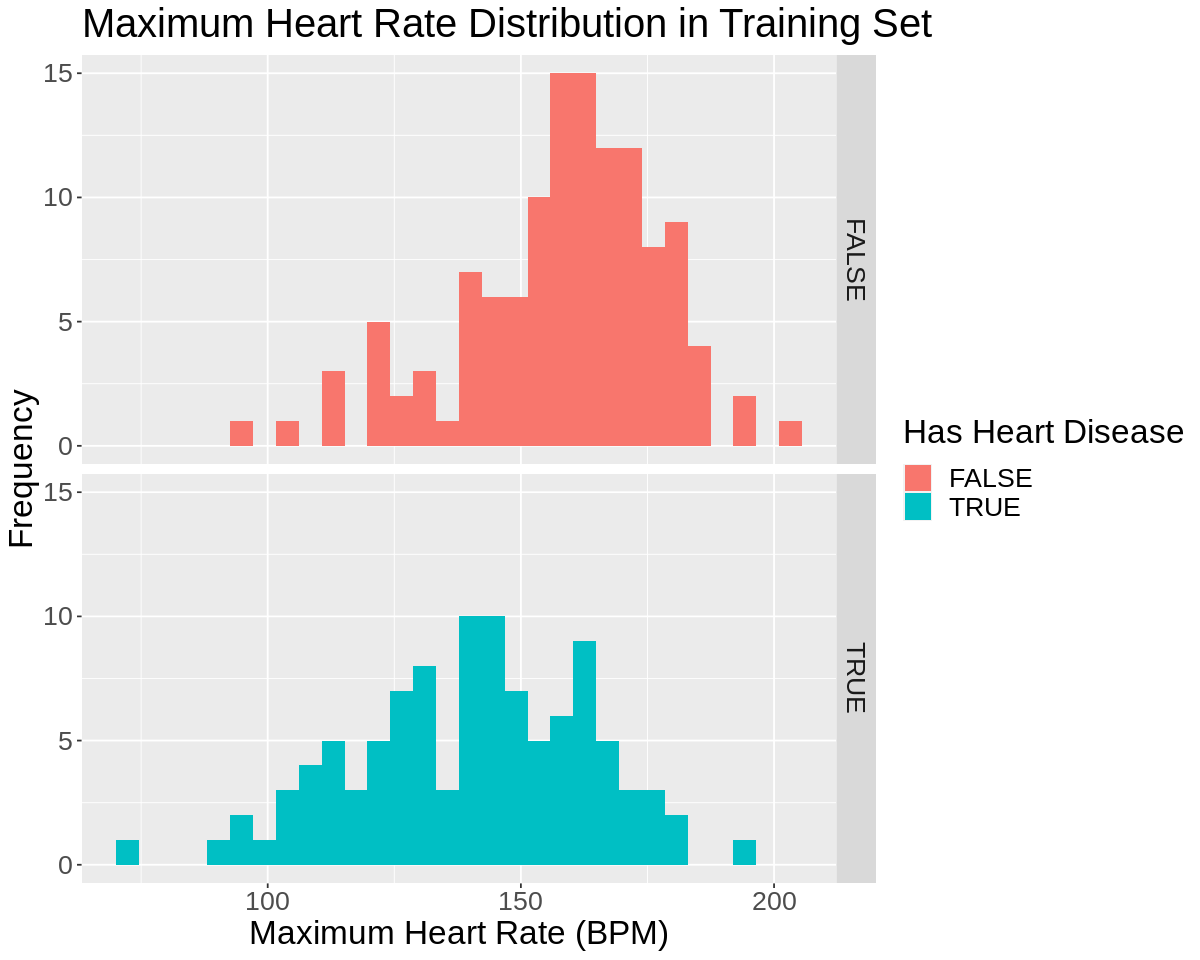

In [23]:
# visualisations 
# histogram of thalach distribution in training set 
heart_train_thalach_hist <- heart_train %>% 
    select(thalach, heart_disease) %>%
    mutate(n = n()) %>%
    ggplot(aes(x = thalach, fill = heart_disease)) + 
    geom_histogram(bins = 30) + 
    facet_grid(rows = vars(heart_disease)) +
    labs(x = "Maximum Heart Rate (BPM)", y = "Frequency", fill = "Has Heart Disease", title = "Maximum Heart Rate Distribution in Training Set") +
    theme(text = element_text(size = 20))
heart_train_thalach_hist


#### Figure 2

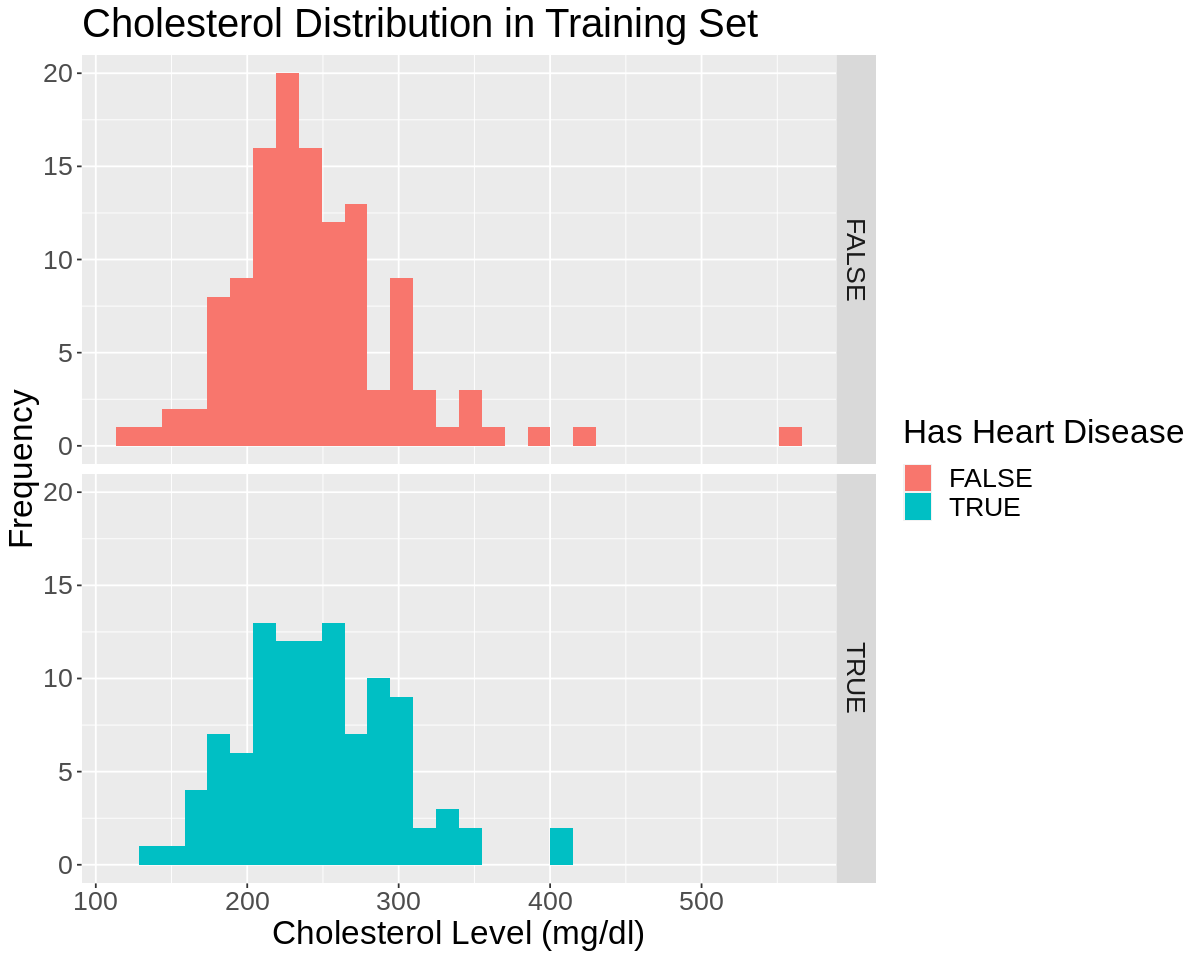

In [10]:
# histogram of chol distribution in training set 
heart_train_chol_hist <- heart_train %>% 
    select(chol, heart_disease) %>% 
    mutate(n = n()) %>% 
    ggplot(aes(x = chol, fill = heart_disease)) + 
    geom_histogram(bins = 30) +
    facet_grid(rows = vars(heart_disease)) + 
    labs(x = "Cholesterol Level (mg/dl)", y = "Frequency", fill = "Has Heart Disease", title = "Cholesterol Distribution in Training Set") +
    theme(text = element_text(size = 20)) 
heart_train_chol_hist

#### Figure 3

Finally, the final scatterplot `Plot of Cholesterol Levels and Maximum Heart Rate versus Heart Disease Status` compares the number of observations for each class. The scatterplot visualises the maximum heart rate against cholesterol level, with angiographic disease status as colour. The plot visualises all three variables we will use for our classifier model. We can see that there is no distinct pattern between `thalach` and `chol`, which shows that there is no significant relationship between our predictor variables. This is a good sign, because using predictor variables that are highly correlated can decrease the impact of the predictor on our model (it's similar to predicting with one variable). 

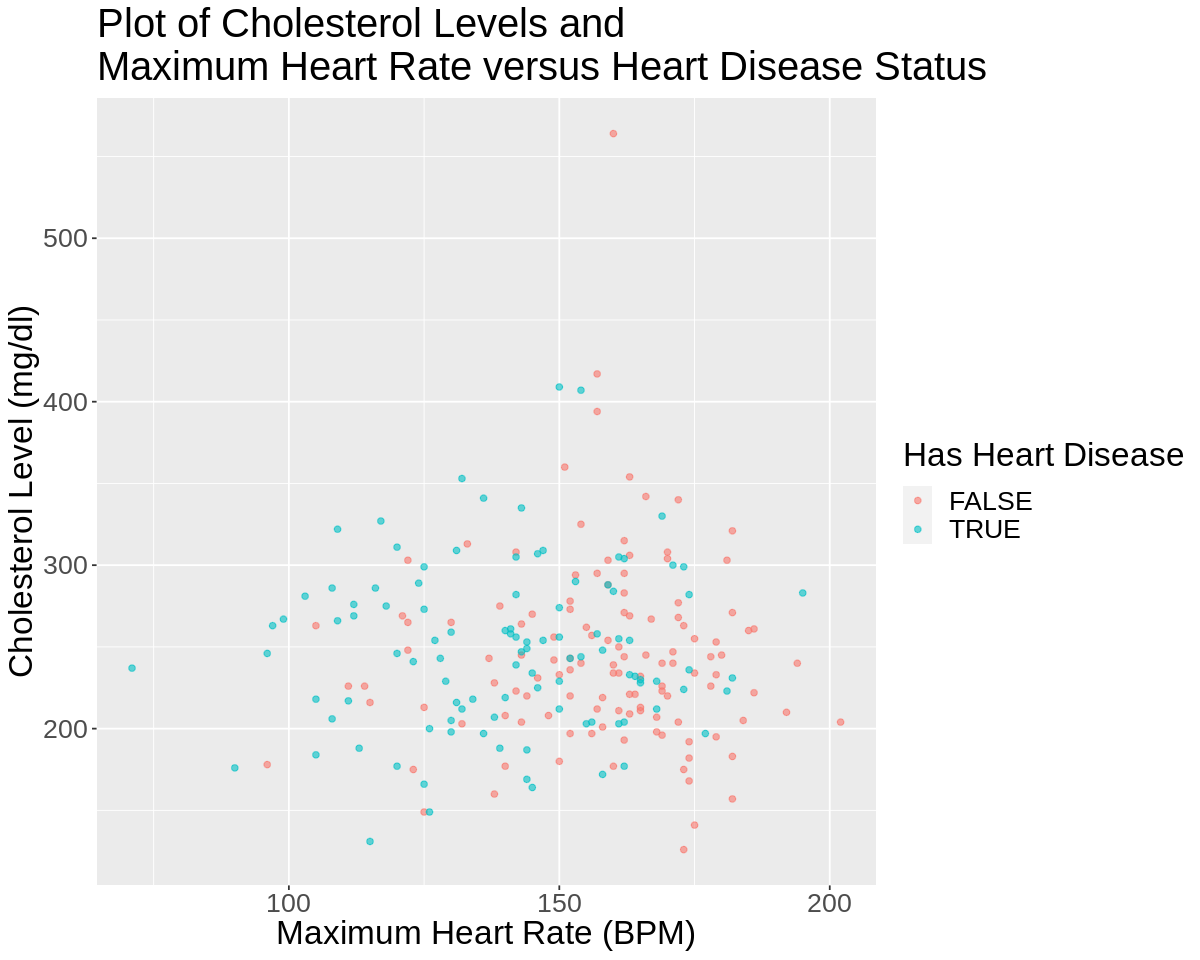

In [11]:
# scatterplot of chol vs max heart rate (thalach) vs heart_disease status
heart_train_plot <- ggplot(heart_train, aes(x = thalach, y = chol, color = heart_disease)) +
    geom_point(alpha = 0.6) +
    labs(x = "Maximum Heart Rate (BPM)", y  = "Cholesterol Level (mg/dl)", color = "Has Heart Disease", title = "Plot of Cholesterol Levels and \nMaximum Heart Rate versus Heart Disease Status") +
    theme(text = element_text(size = 20))
heart_train_plot

#### Figure 4

### Cross-Validation
In order to determine which `k` produces the KNN model with the best accuracy for our training set, we will perform cross-validation for a range of possible `k` values. Recall that we do not use our testing set for any aspect of training, including cross-validation. This involves creating a KNN spec, recipe, folds, range of possible `k` values, and performing cross validation. We will go through each of these processes step by step in this section.

When we create our KNN spec, set `neighbor = tune()` so that our model can take a range of values of `k`. Since we are using a KNN model for classification between `TRUE` or `FALSE`, we set the engine as `kknn` and mode as `classification`.     

In [12]:
knn_tune<- nearest_neighbor(weight_func = "rectangular", neighbor = tune())|>
    set_engine("kknn")|>
    set_mode("classification")

Our recipe predicts heart_disease with predictor variables `thalach` and `chol`. In the data `heart_train`, the only 3 columns are `heart_disease`, `thalach` and `chol`, so we state that all the columns except `heart_disease` (class) will be used as predictor variables. Since our distance function for KNN is sensitive to the scales of our predictor variables. To fix this, we scale and centre both of our predictor variables `heart_disease` and `thalach`.  

In [13]:
knn_recipe<- recipe(heart_disease ~ ., data = heart_train)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())

To perform cross validation, we need to define how many folds we want to have in our cross-validation. We chose 5 in this case, because our data was medium-sized (approx. 300 rows), so we wanted to have enough data in each validation set.  

In [14]:
set.seed(1000)
heart_vfold<- vfold_cv(heart_train, v = 5, strata = heart_disease)

Then, we set the range of `k` values we want to try for our `k` tuning. We chose a range from 1 to 100, which may be computationally expensive, but it will try out a wide range of values and see which value will fit our data best. 

In [15]:
gridvals<- tibble(neighbors = seq(from = 1,to = 100, by=5))

After collecting all necessary parts to perform the cross-validation, we put it all together in a `workflow()` and add the recipe, model, vfolds, and the `k` values we want to try. Then, we call `collect_metrics()` to get information on how our cross-validation performed.

In [16]:
knn_result<- workflow() %>% 
    add_recipe(knn_recipe) %>% 
    add_model(knn_tune) %>% 
    tune_grid(resamples = heart_vfold, grid = gridvals) %>% 
    collect_metrics()

With the results we collected, we now find which `k` (neighbor) value gives the highest mean accuracy. From this data, the best `k` to choose is `k=61`. Since this value seems quite high, we will plot the accuracies in a graph.

In [17]:
accuracies <- knn_result %>% 
    filter(.metric == "accuracy") 

head(accuracies %>% arrange(desc(mean)), 10)

best_k <- 61

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
61,accuracy,binary,0.6699912,5,0.02135386,Preprocessor1_Model13
96,accuracy,binary,0.6657400,5,0.02341715,Preprocessor1_Model20
66,accuracy,binary,0.6655424,5,0.01561500,Preprocessor1_Model14
91,accuracy,binary,0.6572420,5,0.03074848,Preprocessor1_Model19
71,accuracy,binary,0.6567457,5,0.02322014,Preprocessor1_Model15
76,accuracy,binary,0.6566491,5,0.02240263,Preprocessor1_Model16
56,accuracy,binary,0.6525999,5,0.02313668,Preprocessor1_Model12
81,accuracy,binary,0.6521036,5,0.02273740,Preprocessor1_Model17
86,accuracy,binary,0.6479534,5,0.02443255,Preprocessor1_Model18


#### Table 5

When plotting the accuracy estimate (`mean`) vs `k` in figure 5, we can see that there is a clear peak at `k=61` and its nearby points all have relatively high accuracy estimates. It seems like the accuracy estimate for `k=100` is also high, but we want to choose a smaller `k` if possible to avoid underfitting. We will choose `k=61` for this KNN model. 

We recognize that this is a relatively high `k` value, considering that our dataset has 303 observations and our testing set has 76 observations. We chose `k=61` because it had the peak estimated accuracy. Since `k` is relatively large, there is a risk of underfitting our model. However, we will try this value of `k` since it shows the highest estimated accuracy. 

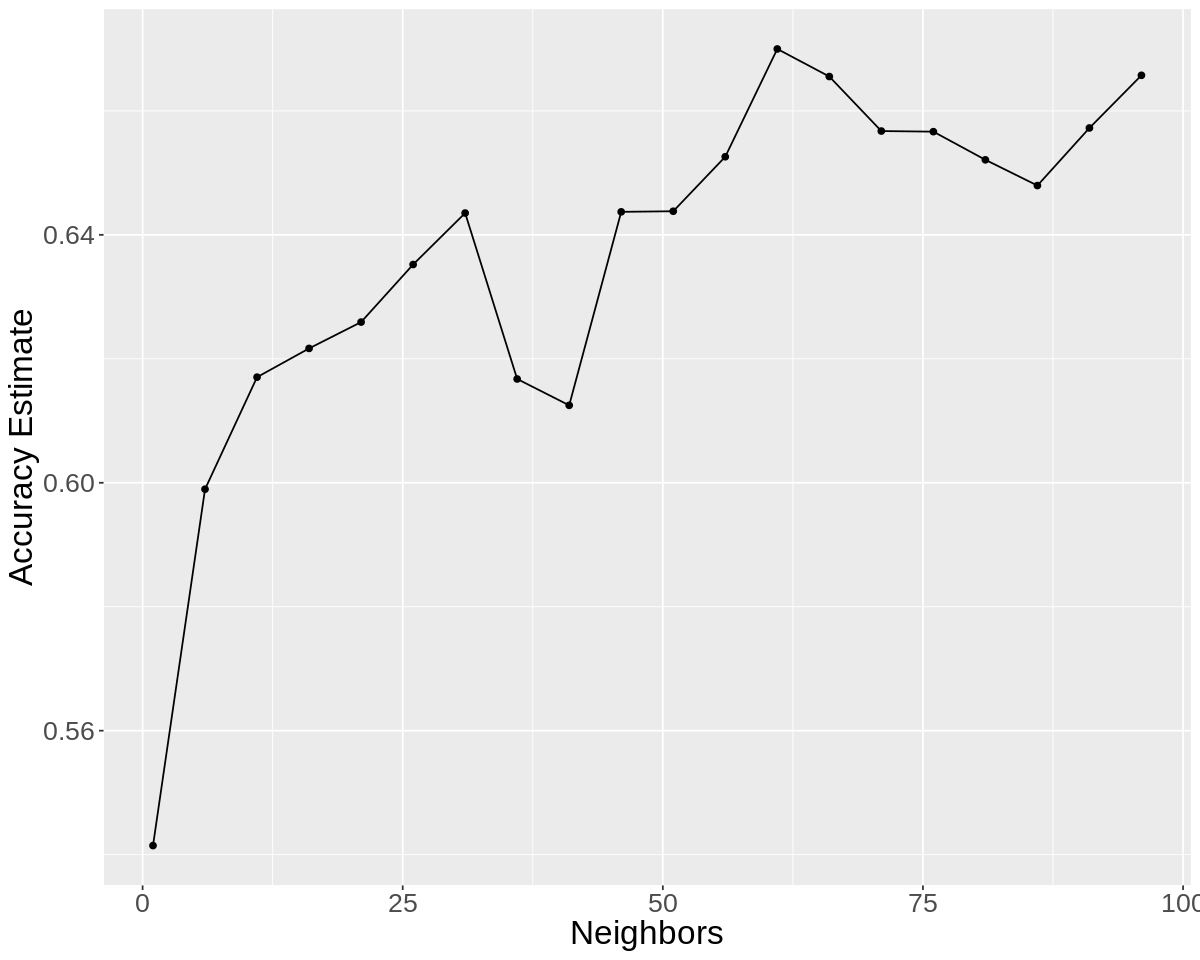

In [18]:
accuracy_vs_k_plot<- accuracies %>%
    ggplot(aes(x = neighbors, y = mean)) + 
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20))
accuracy_vs_k_plot

#### Figure 5

### Classification with Best K
Now that we have found the best `k`, we can create a KNN model that predicts `heart_disease` based on the (scaled and centered) predictor variables `thalach` and `chol` with `k=61`. Similar to what we did above in the cross-validation step, we create `knn_spec` with `neighbor = best_k = 61` with the same engine (`kknn`) and mode (`classification`). This creates a KNN specification with the roughly optimal `k` value we found in the previous part. 

In [19]:
knn_spec<- nearest_neighbor(weight_func = "rectangular", neighbor = best_k)|>
    set_engine("kknn")|>
    set_mode("classification")

With the KNN specification and recipe from the previous part (the recipe does not have to change, because the predictors and labels remain the same), we can finally fit it to our training data to create the KNN classifier model! 

In [20]:
knn_fit<- workflow() %>%
    add_recipe(knn_recipe) %>%
    add_model(knn_spec) %>%
    fit(data = heart_train)

Then, we will find the accuracy of our model using test data. To do this, need to predict predict the testing set with our model that we trained using the training set. Then, we will collect the metrics and only get the accuracy metric. This shows how accurate our model was at predicting the test dataset. The accuracy of this model on our testing dataset is roughly 71.05%. 

In [21]:
heart_test_predictions <- knn_fit|>
    predict(heart_test)|>
    bind_cols(heart_test)
head(heart_test_predictions, 10)

heart_test_accuracy <- heart_test_predictions %>%
    metrics(truth = heart_disease, estimate = .pred_class)|>
    filter(.metric == "accuracy") 
paste("Accuracy: ", toString(heart_test_accuracy %>% select(.estimate) %>% pull()))

.pred_class,thalach,chol,heart_disease
<fct>,<dbl>,<dbl>,<fct>
FALSE,187,250,FALSE
FALSE,178,236,FALSE
FALSE,160,268,TRUE
FALSE,148,192,FALSE
FALSE,162,199,FALSE
FALSE,171,266,FALSE
FALSE,144,211,FALSE
TRUE,132,206,TRUE
TRUE,114,167,TRUE


[1] "Accuracy:  0.710526315789474"

#### Table 6

With our accuracy of 71.05%, our model predicts the presence of a heart disease 21% better than we would if we were to randomly guess TRUE or FALSE. We think that a high accuracy would be above 85%, so we would not say that our model predicts very well using the predictors `thalach` and `chol`.  

Let's see how our model predicted with a confusion matrix. We will set the true value as `heart_disease`, and the actual value we got from our model as `.pred_class` that we used `bind_cols(heart_test)` to add the predictions as a column.

In [22]:
heart_conf_mat <- heart_test_predictions |> 
      conf_mat(truth = heart_disease, estimate = .pred_class)
heart_conf_mat

          Truth
Prediction FALSE TRUE
     FALSE    34   15
     TRUE      7   20

#### Table 7

From the confusion matrix, we can see that our model correctly predicted `34 + 20 = 54` classes and incorrectly predicted `15 + 7 = 22` classes out of 76 observations in our testing set. There are 7 false positives total, which account for 9.2% of the testing data. There are 15 false negatives that account for 19.7% of the testing data. From this analysis, we determined that our data produced more than double the proportion of false negatives than false positives. 

## Discussion

### Conclusion and Limitations
Although implementing machine learning techniques can help predict whether a patient has cardiovascular disease, we found from our predictions that we may not fully trust these techniques. With our KNN classification model, we achieved an accuracy of 71.05% in correctly predicting the presence of heart disease in an individual, which is not very reliable in the medical field. However, this raises questions on whether our approach is a competitive method for classifying heart disease, and how we can improve the predictive model.

Also note that our confusion matrix in table 7 demonstrated that we produce more than double the proportion of false negatives than false positives. We would like to investigate why our model predicts false negatives more frequently and try to reduce the number of false negatives. This would mean that there are more type 2 errors than type 1 errors. We would like to reduce the number of false negatives, since this would mean that there is a high chance that a heart disease will go undetected. We would rather produce more false positives so that the patient can get treated (then find out their heart is healthy), than to send a patient home thinking that they are healthy when in reality they have a heart disease.

Figure 1 shows that the training set consists of 123 patients with heart disease and 104 patients without it, which corresponds to a relatively even 54:46 class ratio. This means that class imbalance is likely not an issue. Figure 2 shows the distribution of thalach in patients without heart disease is right skewed, while it is more normally distributed for individuals who have heart disease. This indicates an association with high thalach and lower risk of heart disease in a patient. On the other hand, figure 3 shows the distributions of cholesterol levels in patients with and without heart disease are very similar. It shows no apparent relationship between heart disease and cholesterol levels, which is unlike what we expected. We also found from figure 4 that there is no relationship between the predictive variables thalach and cholesterol levels. This lack of multicollinearity suggests that these variables are valid predictors for our model. 

Hence, the causes of the implausible accuracy narrows down to the limited existing data that we based our classification model on, and whether there are better predictive variables to use for the model. Moreover, there may be better approaches to creating a predictive model, such as logistic regression and random forest algorithm. 

### What we Expected to Find
From the findings of Sandvik et al. (1995) and Mortensen et al. (2020), we expected that high cholesterol levels and low maximum heart rate indicate weak cardiac strength and an enhanced risk of heart disease. If the classifier was more accurate, it may be refined for automated diagnosis of heart disease for use by healthcare professionals to perform time-efficient medical assessments of potential cardiac patients. Additionally, it allows doctors to attribute less health markers to heart disease.

### Impact of Our Findings
Our model has a 71% accuracy of correctly predicting the presence of a heart disease given a patient’s maximum heart rate and cholesterol levels. Taking into consideration that our dataset is based on one hospital (V. A. Medical Center) in Cleveland with a relatively small sample size of only 303 observations and two predictors, the accuracy of our model is tolerable. This finding gives hope that if we were to recreate this project with a larger dataset and using more predictors, we may be able to reach a much higher accuracy. In the field of medical technology, an improved version of a KNN model with a very large dataset and many predictors may qualify to be used in clinical settings. 

### Future Questions
While analyzing our model, we discovered several ways in which we may be able to improve our model. We can verify whether these methods would work in practice by posing the following questions: 
- Which features are most correlated with heart disease?
- How can we make our model as robust to outliers as possible?
- How can we improve our model by adding additional predictive variables from the dataset?
- Would adding more datasets from a variety of regions (outside of Cleveland) help generalize our model for patients globally? 
- How can we reduce the number of false negatives that our model produces? 


## References

### Data set used:
Heart Disease Data Set (https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.


### Citations:
Janosi A.; Steinbrunn W.; Pfisterer M.; Detrano R.; (n.d.). Heart Disease Data Set. UCI Machine Learning Repository: Heart disease data set. Retrieved December 7, 2022, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease


Mortensen M.B.; Nordesgaard B.G.; (2020, November). Elevated LDL cholesterol and increased risk of myocardial infarction and atherosclerotic cardiovascular disease in individuals aged 70-100 Years: A contemporary primary prevention cohort. Lancet (London, England). Retrieved December 7, 2022, from https://pubmed.ncbi.nlm.nih.gov/33186534/


Sandvik L.;Erikssen J.;Ellestad M.;Erikssen G.;Thaulow E.;Mundal R.;Rodahl K.; (1995, August). Heart rate increase and maximal heart rate during exercise as predictors of cardiovascular mortality: A 16-year follow-up study of 1960 healthy men. Coronary artery disease. Retrieved December 7, 2022, from https://pubmed.ncbi.nlm.nih.gov/8574463/#:~:text=Conclusions%3A%20Both%20heart%2Drate%20difference,and%20conventional%20coronary%20risk%20factors.


Public Health Agency of Canada. (2022, July 28). Government of Canada. Canada.ca. Retrieved December 7, 2022, from https://www.canada.ca/en/public-health/services/publications/diseases-conditions/heart-disease-canada.html  
